In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


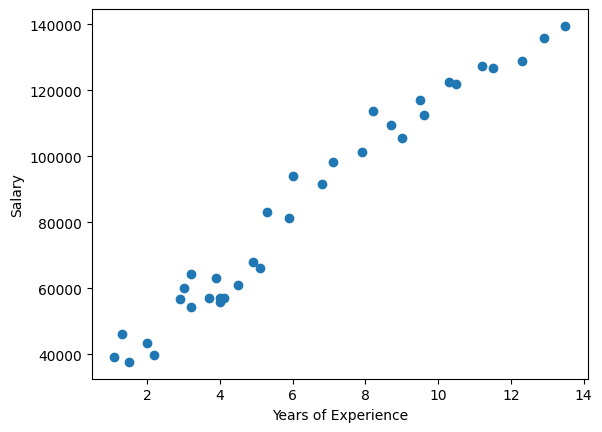

In [2]:
# Load dataset
df = pd.read_csv('salary.csv')
print(df.head())

# Plot data
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [3]:
X = df[['YearsExperience']].values
y = df['Salary'].values

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [11]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_poly_test)

In [13]:
print(f"Slope (Coefficient): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Slope (Coefficient): [    0.         10663.64799196  -147.07674975]
Intercept: 23956.63556325034


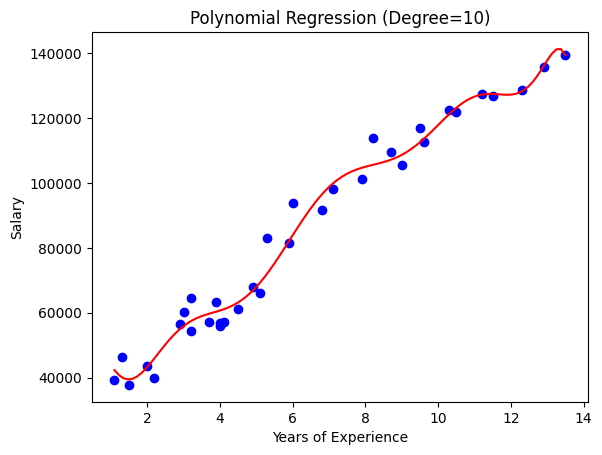

In [8]:
# Plot regression curve
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_curve, y_curve, color='red')
plt.title('Polynomial Regression (Degree=10)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# After training the model and making predictions (y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² Score: 0.96
MSE: 21082095.27
RMSE: 4591.52
MAE: 3527.60
